In [4]:
import sys
import os
import math
import importlib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [36]:
def simulate(initialRatio):
    rand = random.Random(1337)
    nprand = np.random.RandomState(1337)
    populationSize = 5000 # small town 
    # model # of children as Poisson:
    # 2.5 avg children, and for Poisson, mean=variance
    # note that the 2.5 number is for present day - that's a conservative choice for it
    # since in past it's much higher:
    # https://ourworldindata.org/fertility-rate#the-number-of-children-per-woman-over-the-very-long-run
    numChildrenMeanVariance = 2.5
    # initialize the initial generation
    initialSeeds = rand.sample(range(populationSize), int(populationSize * initialRatio))
    population = [False]*populationSize    
    for i in initialSeeds:
        population[i] = True
    
    result = [(populationSize, len(initialSeeds))]
        
    # start simulating
    generations = 10
    for generation in range(generations):
        # shuffle the array
        newpopulation = []
        rand.shuffle(population)
        popWithTrait = 0
        # for each (randomly shuffled) pair:
        endval = len(population) & ~1
        for i in range(0, endval, 2):
            # generate number of children
            # if any parent has it, child has it
            hasIt = population[i] or population[i+1]
            numChildren = int(nprand.poisson(numChildrenMeanVariance))
            newpopulation = newpopulation + [hasIt]*numChildren
            if hasIt:
                popWithTrait += numChildren
        print(len(newpopulation), popWithTrait)
        result.append((len(newpopulation), popWithTrait))
        population = newpopulation
    return result

In [37]:
ratios = [0.01, 0.05, 0.10, 0.15, 0.20]
simresults = []
for ratio in ratios:
    print("starting", ratio)
    simresults.append(simulate(ratio))

starting 0.01
6274 122
7931 309
9802 762
12308 1893
15391 4408
19233 9394
24130 17844
30183 28139
37865 37670
47289 47289
starting 0.05
6274 641
7931 1511
9802 3410
12308 7127
15391 12619
19233 18552
24130 24091
30183 30183
37865 37865
47289 47289
starting 0.1
6274 1193
7931 2673
9802 5470
12308 9924
15391 14831
19233 19214
24130 24130
30183 30183
37865 37865
47289 47289
starting 0.15
6274 1768
7931 3907
9802 7301
12308 11511
15391 15294
19233 19233
24130 24130
30183 30183
37865 37865
47289 47289
starting 0.2
6274 2247
7931 4629
9802 8152
12308 11904
15391 15380
19233 19233
24130 24130
30183 30183
37865 37865
47289 47289


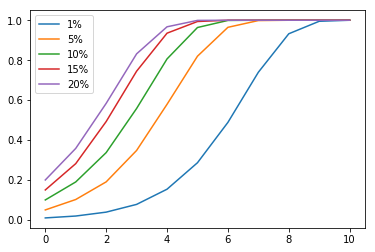

In [42]:
for i in range(len(ratios)):
    simresult = simresults[i]
    ratio = [a[1]/a[0] for a in simresult]
    plt.plot(list(range(len(simresult))), ratio, label=str(int(ratios[i]*100)) + "%")
plt.legend()

In [49]:
def simulate_const(initialRatio):
    rand = random.Random(1337)
    populationSize = 2726150 # matches 1809 pop
    # initialize the initial generation
    initialSeeds = rand.sample(range(populationSize), int(populationSize * initialRatio))
    population = [False]*populationSize    
    for i in initialSeeds:
        population[i] = True
    
    result = [(populationSize, len(initialSeeds))]
        
    # start simulating
    generations = 10
    for generation in range(generations):
        # shuffle the array
        newpopulation = [False]*len(population)
        rand.shuffle(population)
        popWithTrait = 0
        # for each (randomly shuffled) pair:
        endval = len(population) & ~1
        for i in range(0, endval, 2):
            # generate number of children
            # if any parent has it, child has it
            hasIt = population[i] or population[i+1]
            if hasIt: # changed from above!
                newpopulation[i] = newpopulation[i+1] = True
                popWithTrait += 2
        print(len(newpopulation), popWithTrait)
        result.append((len(newpopulation), popWithTrait))
        population = newpopulation
    return result
simresults_const = []
for ratio in ratios:
    print("starting", ratio)
    simresults_const.append(simulate_const(ratio))

starting 0.01
2726150 54272
2726150 107456
2726150 210786
2726150 405578
2726150 751090
2726150 1295710
2726150 1974608
2726150 2519108
2726150 2710120
2726150 2726064
starting 0.05
2726150 265734
2726150 505810
2726150 917770
2726150 1526582
2726150 2198516
2726150 2624200
2726150 2722284
2726150 2726144
2726150 2726150
2726150 2726150
starting 0.1
2726150 518422
2726150 937902
2726150 1551782
2726150 2219684
2726150 2631902
2726150 2722808
2726150 2726150
2726150 2726150
2726150 2726150
2726150 2726150
starting 0.15
2726150 756358
2726150 1302388
2726150 1982522
2726150 2523748
2726150 2711010
2726150 2726048
2726150 2726150
2726150 2726150
2726150 2726150
2726150 2726150
starting 0.2
2726150 981700
2726150 1610332
2726150 2269052
2726150 2650148
2726150 2724096
2726150 2726150
2726150 2726150
2726150 2726150
2726150 2726150
2726150 2726150


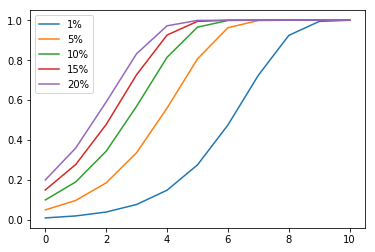

In [50]:
for i in range(len(ratios)):
    simresult = simresults_const[i]
    ratio = [a[1]/a[0] for a in simresult]
    plt.plot(list(range(len(simresult))), ratio, label=str(int(ratios[i]*100)) + "%")
plt.legend()

In [51]:
# Just for fun: what if only one child gets the trait? (matches Guardian)

def simulate_onlyone(initialRatio):
    rand = random.Random(1337)
    populationSize = 2726150 # matches 1809 pop
    # initialize the initial generation
    initialSeeds = rand.sample(range(populationSize), int(populationSize * initialRatio))
    population = [False]*populationSize    
    for i in initialSeeds:
        population[i] = True
    
    result = [(populationSize, len(initialSeeds))]
        
    # start simulating
    generations = 10
    for generation in range(generations):
        # shuffle the array
        newpopulation = [False]*len(population)
        rand.shuffle(population)
        popWithTrait = 0
        # for each (randomly shuffled) pair:
        endval = len(population) & ~1
        for i in range(0, endval, 2):
            # generate number of children
            # if any parent has it, child has it
            hasIt = population[i] or population[i+1]
            if hasIt: # changed from above!
                newpopulation[i] = True
                popWithTrait += 1
        print(len(newpopulation), popWithTrait)
        result.append((len(newpopulation), popWithTrait))
        population = newpopulation
    return result
simresults_onlyone = []
for ratio in ratios:
    print("starting", ratio)
    simresults_onlyone.append(simulate_onlyone(ratio))

starting 0.01
2726150 27136
2726150 27013
2726150 26876
2726150 26748
2726150 26625
2726150 26489
2726150 26364
2726150 26248
2726150 26135
2726150 26004
starting 0.05
2726150 132867
2726150 129619
2726150 126454
2726150 123500
2726150 120655
2726150 118002
2726150 115365
2726150 112795
2726150 110474
2726150 108212
starting 0.1
2726150 259211
2726150 246837
2726150 235726
2726150 225615
2726150 216339
2726150 207610
2726150 199683
2726150 192314
2726150 185603
2726150 179412
starting 0.15
2726150 378179
2726150 351900
2726150 329192
2726150 309259
2726150 291643
2726150 276020
2726150 262162
2726150 249589
2726150 238331
2726150 227706
starting 0.2
2726150 490850
2726150 446612
2726150 410033
2726150 379278
2726150 352864
2726150 330064
2726150 309964
2726150 292434
2726150 276792
2726150 262744


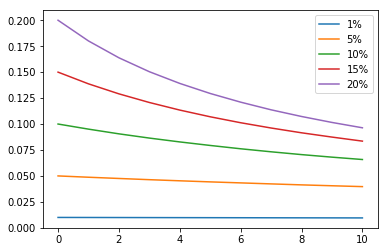

In [52]:
for i in range(len(ratios)):
    simresult = simresults_onlyone[i]
    ratio = [a[1]/a[0] for a in simresult]
    plt.plot(list(range(len(simresult))), ratio, label=str(int(ratios[i]*100)) + "%")
plt.legend()